In [1]:
## import required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the Loan Data
loan_data = pd.read_csv("loan.csv")

In [5]:
#printing the first 5 rows from Loan Data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Analyzing the shape of loan Data
loan_data.shape

(39717, 111)

In [7]:
#Find the total of null values in each column
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#REMOVE the columns that have all the values as NaN

loan_data.dropna(axis =1 ,how ="all", inplace =True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
#Checking the null values in column now
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

__Currently out of 57 columns some columns really dont matter during Loan approval Stage.__ 

__Some columns can be removed as they dont have different values indicating any pattern__  

__Analyzing and removing 10 such columns in first go__  

   - Remove the Id , member_id, emp_title, url,title,zip_code,addr_state columns as it is not contributing much to the data analysis for Loan approval
   - Remove pymnt_plan as it is having single value n
   - Remove desc as it is a string and not much contributing to the Loan approval process
   - Remove delinq_2yrs as it is a parameter used after loan approval
   

In [10]:
#Removing 10 columns identified for removal
loan_data.drop(["id","member_id","emp_title","url","title","zip_code","addr_state","pymnt_plan","desc","delinq_2yrs"],axis=1 , inplace =True)

In [11]:
#Checking the columns number after removing 10 columns
loan_data.shape

(39717, 47)

__Performing analysis on remaining 47 columns and checking what can be removed.__ 

In [12]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


__Analyzing and removing next set of 10 columns__  

   - Removing last_credit_pull_d as it is not providing any data related to loan approval
   - Removing collections_12_mths_ex_med,policy_code, appplication_type,acc_now_delinq,chargeoff_within_12_mths ,delinq_amnt,pub_rec_bankruptcies,tax_liens
     as it is a single valued column and is not providing much value to Loan application approval/rejection
   - Removing initial_list_status as it is single valued and not providing much insights


In [13]:
#printing the columns names 
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [14]:
#Removing next set 10 columns which dont significantly impact the loan approval/rejection
loan_data.drop(["last_credit_pull_d","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens","initial_list_status"],axis=1 , inplace =True)

In [15]:
#chekcing the number of columns after removing second set of 10 columns
loan_data.shape

(39717, 37)

In [16]:
#Printing the current head data for 37 columns data
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16


In [30]:
#Chekcing the remaining 37 columns names
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

__Analyzing and removing columns that is not significantly impacting the Loan approval/rejection criteria__  
__These parameters are used after a Loan is approved. Hence removing it__ 

 - revol_bal
 - out_prncp
 - total_pymnt
 - total_rec_prncp
 - total_rec_int
 - total_rec_late_fee
 - recoveries
 - collection_recovery_fee
 - last_pymnt_d
 - last_pymnt_amnt
 - ne_last_record


In [32]:
#Removing columns above which are mainly the parameters coming after the Loan Approval
loan_data.drop(["revol_bal","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d"],axis=1 , inplace =True)

KeyError: "['revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'] not found in axis"

In [33]:
#printing the remaining column size
loan_data.shape

(39717, 22)

In [34]:
#printing the data head
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [35]:
#printing the remaining 26 columns names
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [36]:
#finding number of NaN values in mths_since_last_delinq	column
loan_data["mths_since_last_delinq"].isnull().sum()

KeyError: 'mths_since_last_delinq'

In [ ]:
#finding number of NaN values in mths_since_last_record column
loan_data["mths_since_last_record"].isnull().sum()

__Since the NaN values are verhy high in both mths_since_last_delinq and mths_since_last_record removing both records from analysis__ 

In [25]:
# Dropping mths_since_last_delinq and maths_since_last_record 

loan_data.drop(["mths_since_last_delinq","mths_since_last_record"],axis=1 , inplace =True)

In [37]:
#printing the current shape
loan_data.shape

(39717, 22)

In [38]:
#Removing out_prncp_inv and total_pymnt_inv as it not adding much significance to the Loan Rental process
loan_data.drop(["total_pymnt_inv","out_prncp_inv"],axis=1 , inplace =True)

KeyError: "['total_pymnt_inv', 'out_prncp_inv'] not found in axis"

In [39]:
#printing the current shape
loan_data.shape

(39717, 22)

__FILLING THE MISSING VALUES__ 

In [40]:
#Checking for Null values in remaining 22 columns
loan_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [41]:
(loan_data.isnull().sum()*100)/len(loan_data)

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

__emp_length and revol_util have the missing values.This needs to be fixed__ 


In [42]:
#fixing emp_length first which have 1075 null values
# Two options can be taken here 
  #1) Either drop all the 1075 rows
  #2) Assign with the mode value of the column or assign with the highest value count

#Proceeding with option#2 for emp_length

#Chekcing the dataType of emp_length

loan_data["emp_length"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38642 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [43]:
#printing the emp_length head values
loan_data.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [44]:
#checking the value_counts for emp_length
loan_data.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [45]:
#checking the mode value for emp_length

emp_length_mode = loan_data.emp_length.mode()[0]
print(emp_length_mode)

10+ years


__The above result of mode and value_counts shows that 10+ years can be assigned for null values in emp_length column__



In [46]:
#Assigning values of null with 10+ Years
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace =True)

In [47]:
#Checking for null values in emp_length
loan_data.emp_length.isna().sum()

0

In [48]:
#Since the values in revol_util is just 50. Dropping those 50 rows from Analysis
loan_data.dropna(axis=0,subset = ["revol_util"] ,inplace=True)
loan_data.revol_util.isna().sum()

0

In [49]:
#Chekcing full columns to see if any of them having any null value
loan_data.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

__DATA STANDARDIZATION__

In [50]:
#checking the current head value
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [52]:
#checking current data types of each columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt          39667 non-null  int64  
 2   funded_amnt_inv      39667 non-null  float64
 3   term                 39667 non-null  object 
 4   int_rate             39667 non-null  object 
 5   installment          39667 non-null  float64
 6   grade                39667 non-null  object 
 7   sub_grade            39667 non-null  object 
 8   emp_length           39667 non-null  object 
 9   home_ownership       39667 non-null  object 
 10  annual_inc           39667 non-null  float64
 11  verification_status  39667 non-null  object 
 12  issue_d              39667 non-null  object 
 13  loan_status          39667 non-null  object 
 14  purpose              39667 non-null  object 
 15  dti                  39667 non-null  floa

In [53]:
# % needs to be removed from int_rate and revol_util and can be converted to float for analysis

loan_data.int_rate= pd.to_numeric(loan_data.int_rate.apply(lambda x: x.split('%')[0]))
loan_data.revol_util= pd.to_numeric(loan_data.revol_util.apply(lambda x: x.split('%')[0]))

In [74]:
# changing emp_length to numberic value by extracting the integer part
#Data have < , + and space which can be used to split the data and convert to float value
loan_data.emp_length= pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split("+")[0] if "+" in x else x.split()[0])))

TypeError: argument of type 'int' is not iterable

In [ ]:
#checking the dataTypes after conversion
loan_data.info()

In [75]:
#Checking the data head
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.9,38


__OUTLIER DETECTION FOR THE EXISTING DATA BEFORE ANALYSIS__

<Axes: ylabel='loan_amnt'>

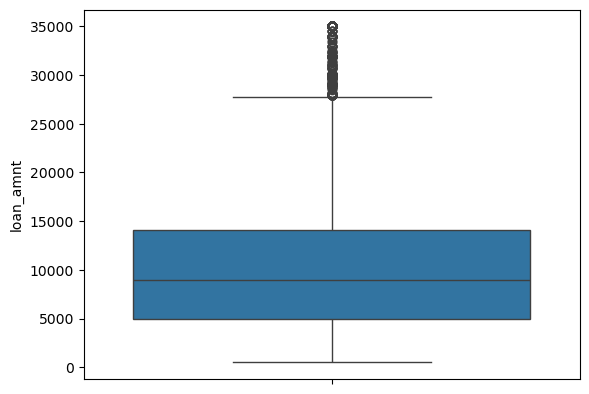

In [76]:
#Analyzing the numerical columns loan_amount and funded_amnt_inv for outlier detection

sns.boxplot(loan_data.loan_amnt)

In [77]:
#checking the quantile value for loan_amnt to see if any data needs to be removed

loan_data.loan_amnt.quantile([0.75,0.80 ,0.85,0.90,0.95,0.97,0.98,0.99,1])

0.75    14125.0
0.80    15000.0
0.85    17500.0
0.90    20000.0
0.95    24625.0
0.97    25000.0
0.98    28000.0
0.99    32920.0
1.00    35000.0
Name: loan_amnt, dtype: float64

__There is no huge difference in loan_amnt amount data and distribution is almost consistent__  
__No need to remove any outliers from loan_amnt column__

<Axes: ylabel='funded_amnt_inv'>

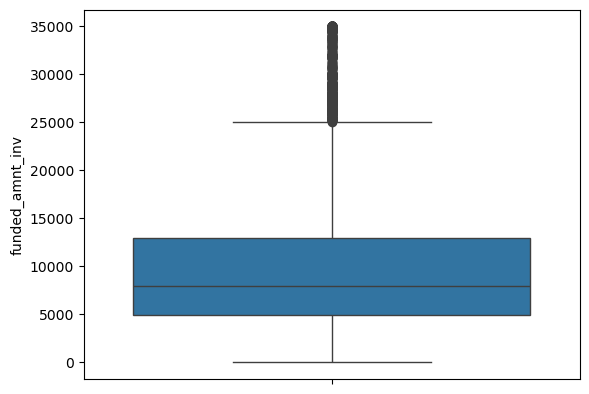

In [78]:
#Checking funded_amnt_inv for outliers
sns.boxplot(loan_data.funded_amnt_inv)

In [79]:
#checking the quantile value for funded_amnt_inv to see if any data needs to be removed

loan_data.funded_amnt_inv.quantile([0.75,0.80 ,0.85,0.90,0.95,0.97,0.98,0.99,1])

0.75    12975.000190
0.80    14750.000000
0.85    15975.000000
0.90    18950.000000
0.95    22725.000000
0.97    24841.516566
0.98    25475.000000
0.99    30000.000000
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

__There is no huge difference in funded_amnt_inv data and distribution is almost consistent__  
__No need to remove any outliers from funded_amnt_inv column__

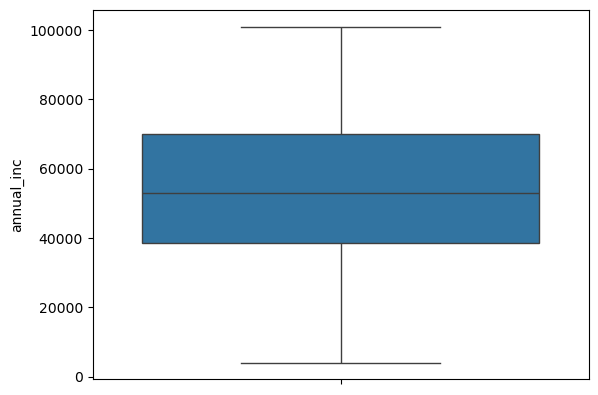

In [83]:
#Checking outliers in annual_inc column
sns.boxplot(loan_data.annual_inc)
plt.show()

__The above data shows some outliers and this needs to be removed__

In [84]:
#checking the quantile info for annual_inc
loan_data.annual_inc.quantile([0.75,0.80 ,0.85,0.90,0.95,0.97,0.98,0.99,1])

0.75     70000.0
0.80     75000.0
0.85     80000.0
0.90     85000.0
0.95     93500.0
0.97     96000.0
0.98     99000.0
0.99    100000.0
1.00    101000.0
Name: annual_inc, dtype: float64

__Considering 95 percenatile as a base mark we can consider data beyond 95 percentile as outlier__

In [85]:
filter_outlier = loan_data["annual_inc"].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <=filter_outlier]

<Axes: ylabel='annual_inc'>

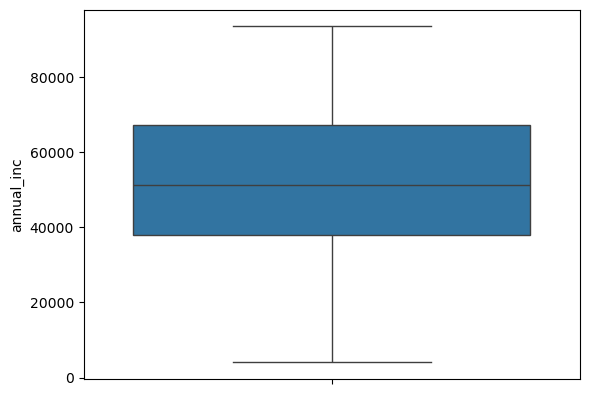

In [86]:
#plotting annual_inc to see if outliers are removed
sns.boxplot(loan_data.annual_inc)

__annual_inc seems to be proper now after removing the outliers__

#Analyzing the loan_status column  

__The current usecase of loan default is applicable only for fully paid or charged off loans__  

__Removing the Current loan from the analysis__ 

In [88]:
loan_data = loan_data[loan_data.loan_status != "Current"]

In [89]:
#Checking the shape value
loan_data.shape

(31486, 22)

In [90]:
#checking the head value
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


In [91]:
#Checking loan_status column is not having Current value
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

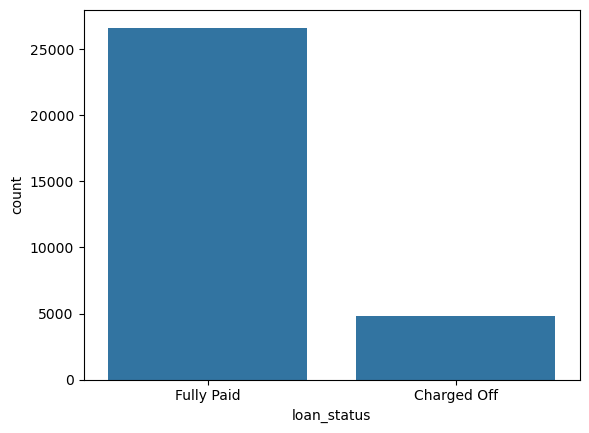

In [92]:
#Plotting to see how many fully paid and charged off loans is present

sns.countplot(x = 'loan_status' ,data =loan_data)
plt.show()

__Few of the numnerical columns are analyzed for outliers__   
__Analyzing Categorical Data to get some insights__ 

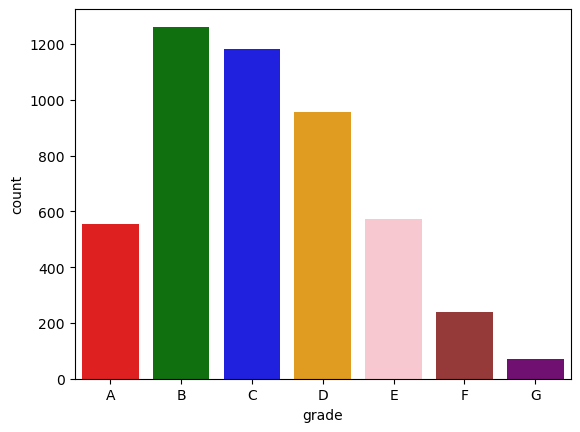

In [97]:
#Analyzing Grade column which is one of the categorical column against charged off loan status

custom_colours = ["red","green","blue","orange","pink","brown","purple"]
sns.countplot(x = 'grade' ,data = loan_data[loan_data.loan_status =="Charged Off"] , order = ['A','B','C','D','E','F','G'] ,palette =custom_colours)
plt.show()

__Above graph indicates that customers with grade B have a high chance of Loan Default__ 

In [98]:
#Printing loan_data head
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


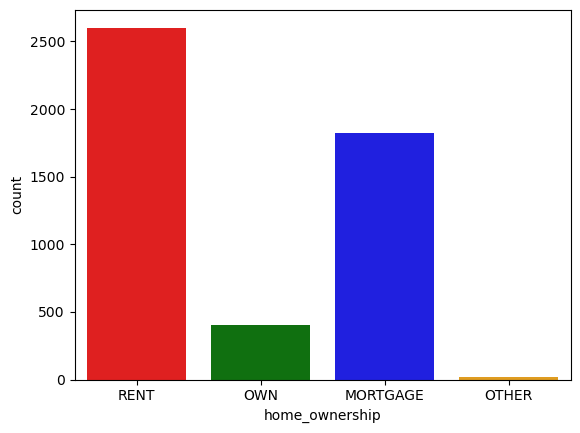

In [100]:
#Analyzing another categorical column home_ownership 
custom_colours = ["red","green","blue","orange"]
sns.countplot(x ="home_ownership" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Above plot shows that customers with RENT as home ownership have the high chance of Default__ 

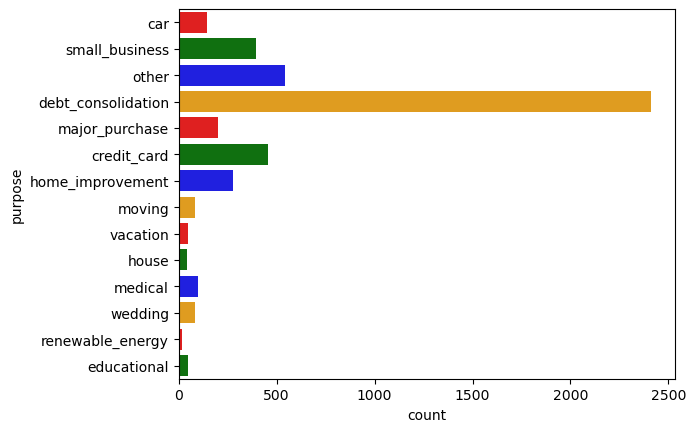

In [101]:
#Analyzing another categorical column Purpose 
custom_colours = ["red","green","blue","orange"]
sns.countplot(y ="purpose" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__The above purpose plot indicates customers with debt_consolidation , ie using a new loan to close the existing loans have a high chance of being defaulted__

In [102]:
#Checking the interest values to create the lables for creating a range
loan_data['int_rate'].describe()

count    31486.000000
mean        11.824139
std          3.612781
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [103]:
#Create group range column for interest rates and find which interest rate have the high chance of default
# from above describe interest rate is begtween 5 to 24 , Dividing to 5 bins.

loan_data["int_rate_range"] = pd.cut(loan_data["int_rate"] , bins=5 ,precision =0 , labels = ["5%-9%" ,"9%-13%","13%-17%","17%-21%" ,"21%-25%"])

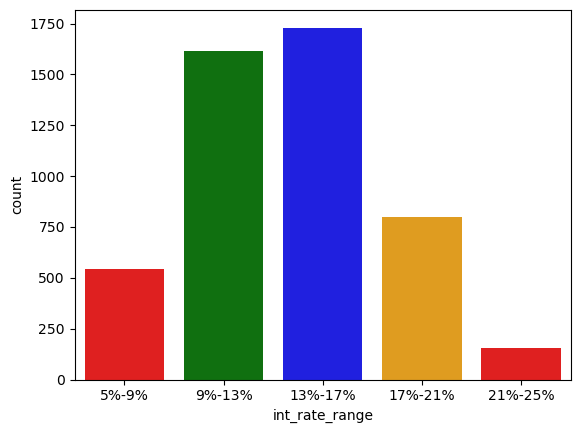

In [104]:
#Plotting interest range
custom_colours = ["red","green","blue","orange"]
sns.countplot(x ="int_rate_range" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Above graph indicates customers with interest range between 13%-17% have a high chance of being Default__

In [105]:
#Priting Data head to analyze further data
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,9%-13%
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,13%-17%
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,13%-17%
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,13%-17%
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,5%-9%


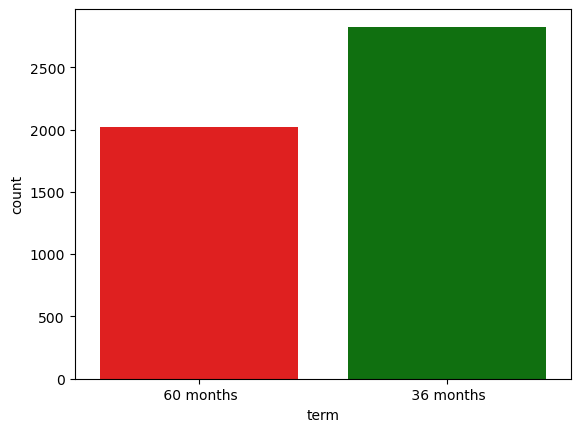

In [107]:
#Analysing Term and Employee Length

#Plotting Term

custom_colours = ["red","green"]
sns.countplot(x ="term" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Applicants with term 36 months have high chance of being defaulted__

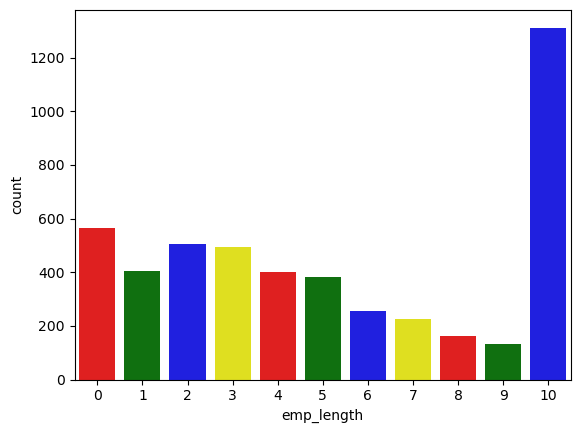

In [108]:
#Plotting Employee length
custom_colours = ["red","green","blue","yellow"]
sns.countplot(x ="emp_length" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Applicants with employee length 10 have the high chance of being defaulted__

In [109]:
#printing the columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'int_rate_range'],
      dtype='object')

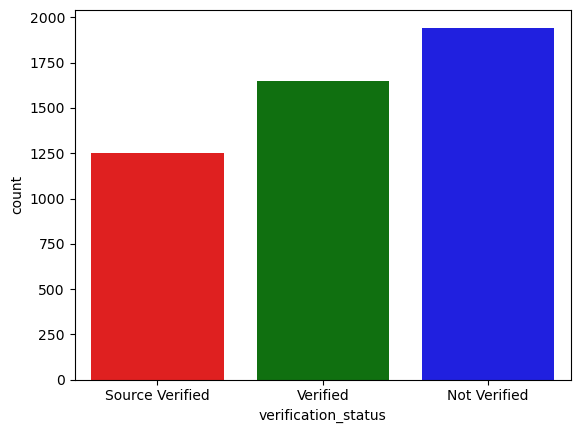

In [110]:
#Analyzing verification status
custom_colours = ["red","green","blue"]
sns.countplot(x ="verification_status" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Above Data indicate Not Verfified Applicants have a high chance of becoming Defaulted__

In [111]:
#Checking the range Loan amount
loan_data['loan_amnt'].describe()

count    31486.000000
mean      9992.518103
std       6531.788276
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13600.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [112]:
#Checking the range funded amount by investor
loan_data['funded_amnt_inv'].describe()

count    31486.000000
mean      9269.056080
std       6234.122848
min          0.000000
25%       4800.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [113]:
#Checking the range for installment
loan_data['installment'].describe()

count    31486.000000
mean       292.341857
std        183.511221
min         15.690000
25%        156.460000
50%        255.340000
75%        386.390000
max       1302.690000
Name: installment, dtype: float64

In [114]:
#Creating Loan Amount range , installment_range and funded amount investor range
loan_data["loan_amnt_range"] = pd.cut(loan_data["loan_amnt"] , bins =9 ,precision =0 ,labels = ["0-4k" ,"4k-8k" ,"8k-12k" ,"12K-16K" ,"16K-20K" ,"20K-24K","24K-28K","28K-32K","32K-36K"])
loan_data["funded_amnt_range"] = pd.cut(loan_data["funded_amnt_inv"] , bins =9 ,precision =0 ,labels = ["0-4k" ,"4k-8k" ,"8k-12k" ,"12K-16K" ,"16K-20K" ,"20K-24K","24K-28K","28K-32K","32K-36K"])
loan_data["installment_range"] = pd.cut(loan_data["installment"] , bins =10 ,precision =0 ,labels = ["15-150" ,"150-300" ,"300-450" ,"450-600" ,"600-750","750-900" ,"900-1050","1050-1200","1200-1350","1350-1500"])

In [115]:
#printing to check the new columns
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_range,loan_amnt_range,funded_amnt_range,installment_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Jan-85,1,3,0,83.7,9,9%-13%,4k-8k,4k-8k,150-300
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Apr-99,5,3,0,9.4,4,13%-17%,0-4k,0-4k,15-150
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Nov-01,2,2,0,98.5,10,13%-17%,0-4k,0-4k,15-150
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Feb-96,1,10,0,21.0,37,13%-17%,8k-12k,8k-12k,300-450
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,Nov-04,3,9,0,28.3,12,5%-9%,4k-8k,4k-8k,150-300


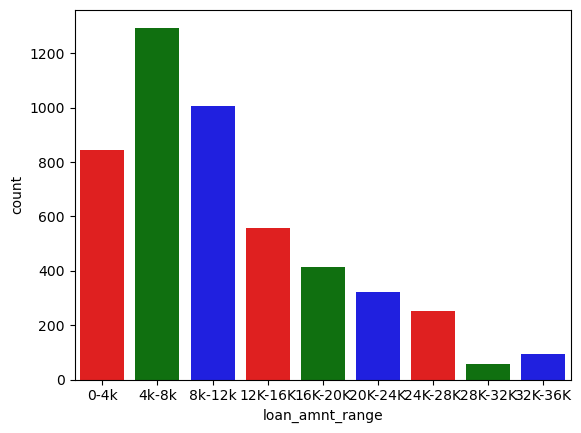

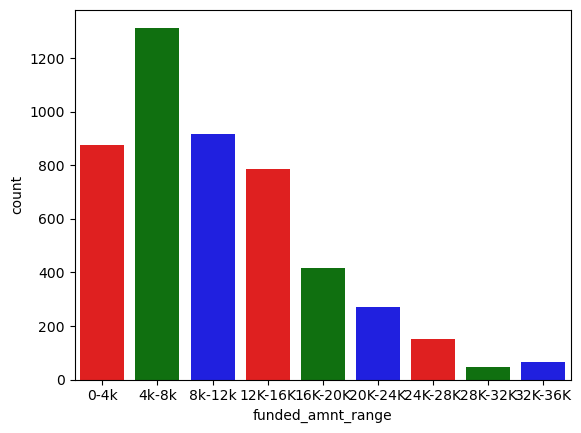

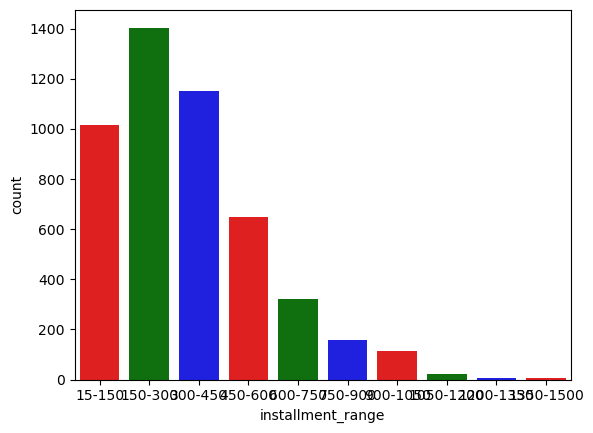

In [116]:
#Plotting loan_amnt_range , funded_amnt_range and installment_range
custom_colours = ["red","green","blue"]
sns.countplot(x ="loan_amnt_range" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

sns.countplot(x ="funded_amnt_range" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

sns.countplot(x ="installment_range" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Loan amount between 4K-8K have the high range of being defaulted__  

__Funded_amount_inv in the range of 4K-8K have the high chance of being defaulted__ 

__installent in the range if 150-300 have the high chance of being defaulted__  

In [117]:
#analyzing dti by creating the range 
#Checking the DTI describe output to understand the range
loan_data["dti"].describe()

count    31486.000000
mean        13.667249
std          6.690681
min          0.000000
25%          8.570000
50%         13.870000
75%         19.020000
max         29.990000
Name: dti, dtype: float64

In [118]:
#Creating range for dti
loan_data["dti_range"] = pd.cut(loan_data["dti"] , bins =10 ,precision =0 ,labels = ["0-3","3-6","6-9","9-12","12-15","15-18","18-21","21-24","24-27","27-30"])

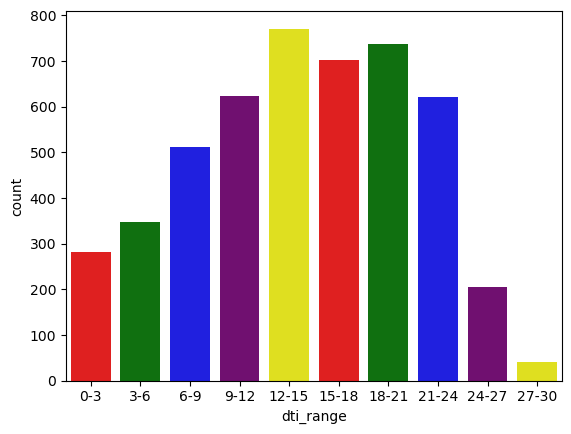

In [119]:
#Plotting dti range
custom_colours = ["red","green","blue","purple","yellow"]
sns.countplot(x ="dti_range" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__dti range of 12-15 have the high chance of being defaulted__

In [120]:
#Analyzing Applicants annual income range
#Creating range for annual income

loan_data["annual_inc"].describe()


count    31486.000000
mean     52628.934546
std      19449.840050
min       4000.000000
25%      38000.000000
50%      51000.000000
75%      67000.000000
max      93500.000000
Name: annual_inc, dtype: float64

In [121]:
#Creating bin range for Annual income 
loan_data["annual_income_range"] = pd.cut(loan_data["annual_inc"] , bins =9 ,precision =0 ,labels = ["4K-20K" ,"20k-36K" ,"36k-52k" ,"52K-68K" ,"68K-84K" ,"84K-100K","100K-116K","116K-132K","132K-148K"])

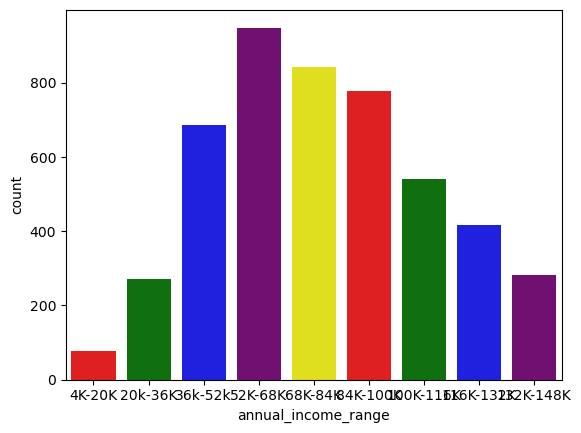

In [122]:
#Plotting annual_income_range
custom_colours = ["red","green","blue","purple","yellow"]
sns.countplot(x ="annual_income_range" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Applicants having a annual_income of range 36k-52K is having high chance of being defaulted__  

In [123]:
#printing the columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'int_rate_range',
       'loan_amnt_range', 'funded_amnt_range', 'installment_range',
       'dti_range', 'annual_income_range'],
      dtype='object')

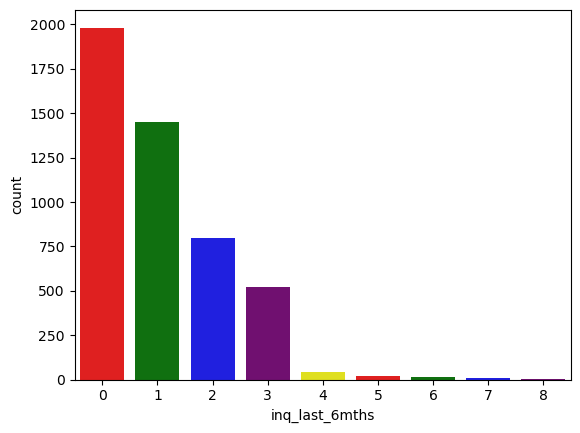

In [124]:
#Analyzing inq_last_6mths column
#Plotting inq_last_6mths
custom_colours = ["red","green","blue","purple","yellow"]
sns.countplot(x ="inq_last_6mths" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Those applicants who have zero inquiry in last 6 monts have high chance of being defaulted__  

In [125]:
#Analyzing open_accounts columns to get some insights

#Creating range for open_accounts

#First Describe open_acc to see the range of values

loan_data["open_acc"].describe()

count    31486.000000
mean         8.909992
std          4.260908
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64

In [126]:
#Creating bin range for open_acc
loan_data["open_acc_range"] = pd.cut(loan_data["open_acc"] , bins =9 ,precision =0 ,labels = ["0-5" ,"5-10" ,"10-15" ,"15-20" ,"20-25" ,"25-30","30-35","35-40","40-45"])

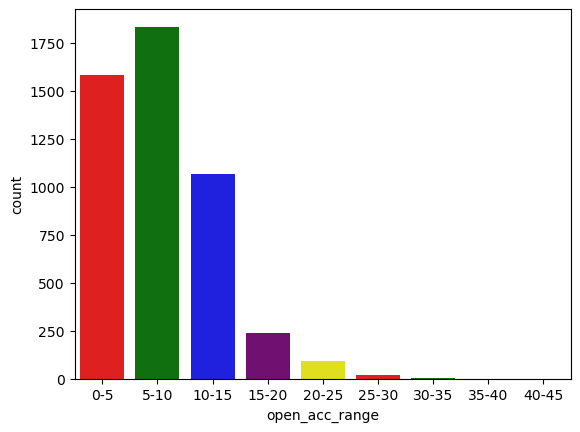

In [127]:
#Plotting open_acc_range
custom_colours = ["red","green","blue","purple","yellow"]
sns.countplot(x ="open_acc_range" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Applicants having open accounts in the range of 5-10 have the high chance of being defaulted__ 

In [128]:
#printing the columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'int_rate_range',
       'loan_amnt_range', 'funded_amnt_range', 'installment_range',
       'dti_range', 'annual_income_range', 'open_acc_range'],
      dtype='object')

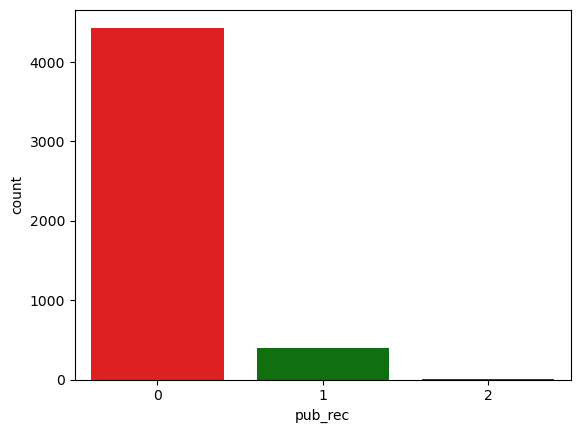

In [129]:
#Analyzing pub_rec column 

#Plotting pub_rec 
#pub_rec explanation - Number of Derogatory public records
custom_colours = ["red","green","blue","purple"]
sns.countplot(x ="pub_rec" , data = loan_data[loan_data.loan_status =="Charged Off"],palette =custom_colours)
plt.show()

__Data shows that when the Derogatory public records is zero there is a chance that applicant can be defaulted__ 

__OBSERVATIONS ON ABOVE ANALYZED DATA__  

__For the Charged off loans there is a more chance of Applicant being default is as follows__   

- Applicants with grade B have a high chance of Loan Default

- Applicants with RENT as home ownership have the high chance of Default

- Applicants with debt_consolidation , ie using a new loan to close the existing loans have a high chance of being defaulted

- Applicants with interest range between 13%-17% have a high chance of being Defaulted

- Applicants with term 36 months have high chance of being defaulted

- Applicants with employee length 10 have the high chance of being defaulted

- Not Verfified Applicants have a high chance of becoming Defaulted

- Loan amount between 4K-8K have the high range of being defaulted

- Funded_amount_inv in the range of 4K-8K have the high chance of being defaulted

- Installent in the range if 150-300 have the high chance of being defaulted

- dti range of 12-15 have the high chance of being defaulted

- Applicants having a annual_income of range 36k-52K is having high chance of being defaulted

- Those applicants who have zero inquiry in last 6 monts have high chance of being defaulted

- Applicants having open accounts in the range of 5-10 have the high chance of being defaulted

- Applicants having Derogatory public records zero have a high chance of being defaulted




## Bivariate Analysis

In [157]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'int_rate_range',
       'loan_amnt_range', 'funded_amnt_range', 'installment_range',
       'dti_range', 'annual_income_range', 'open_acc_range'],
      dtype='object')

In [131]:
loan_data.shape

(31486, 29)

##### Analysis on the below columns 
- loan_amnt
- term
- int_rate
- installment
- grade
- emp_length
- home_ownership
- annual_inc
- purpose

In [132]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_util,total_acc,int_rate_range,loan_amnt_range,funded_amnt_range,installment_range,dti_range,annual_income_range,open_acc_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0,83.7,9,9%-13%,4k-8k,4k-8k,150-300,27-30,36k-52k,0-5
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,0,9.4,4,13%-17%,0-4k,0-4k,15-150,0-3,36k-52k,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0,98.5,10,13%-17%,0-4k,0-4k,15-150,6-9,4K-20K,0-5
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,0,21.0,37,13%-17%,8k-12k,8k-12k,300-450,18-21,68K-84K,5-10
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,0,28.3,12,5%-9%,4k-8k,4k-8k,150-300,9-12,52K-68K,5-10


### Analysis of Loan Amount with other columns

#### Loan Amount vs Term

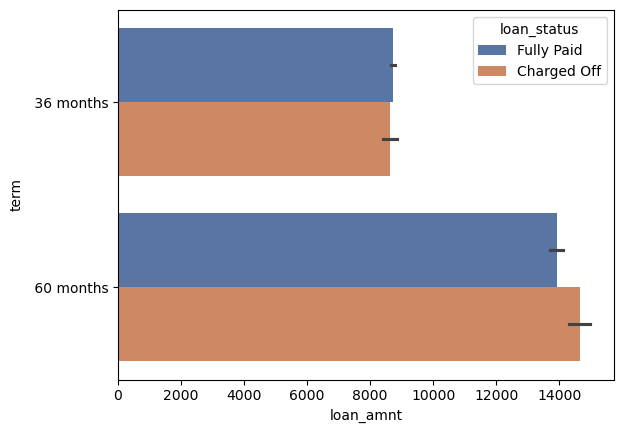

In [154]:
#Analysis of  Loan Amount vs Term
sns.barplot(data =loan_data,x='loan_amnt', y='term', hue ='loan_status',palette="deep")
plt.show()


__Applicants applying for long term applied for more loans__ 

#### Loan Amount vs Interest Rates

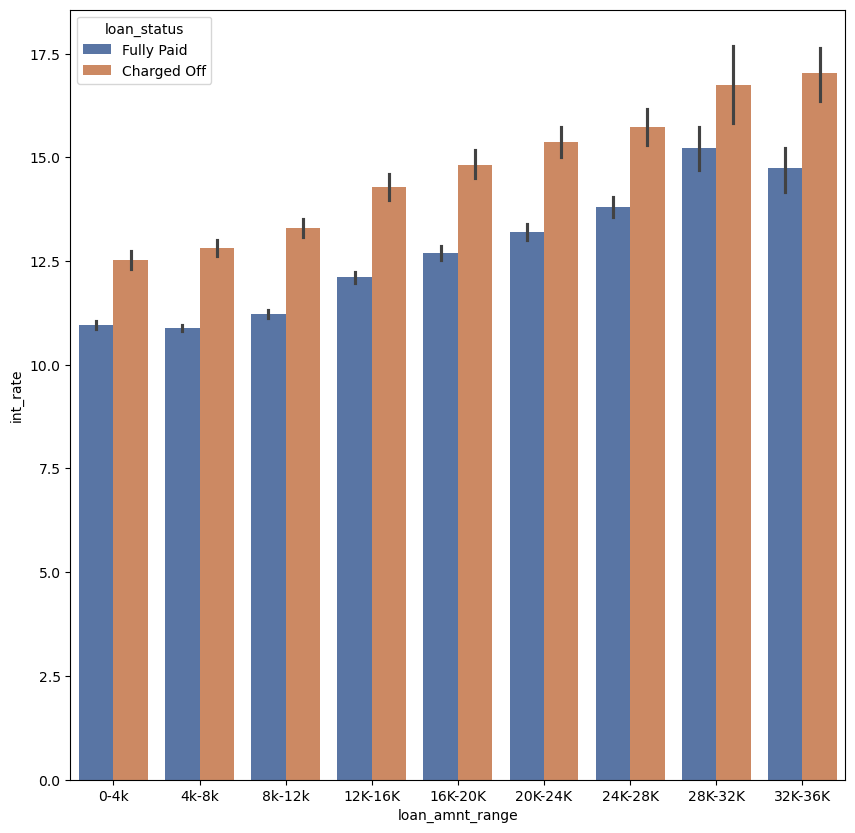

In [155]:
#Analysis of  Loan Amount vs Interest Rates
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_range', y='int_rate', hue ='loan_status',palette="deep")
plt.show()


__Applicants having loan amount in the range of 32k-36k and Interest rates in the range of 15-17.5 have the high chance of being defaulted__ 

#### Loan Amount vs Installment

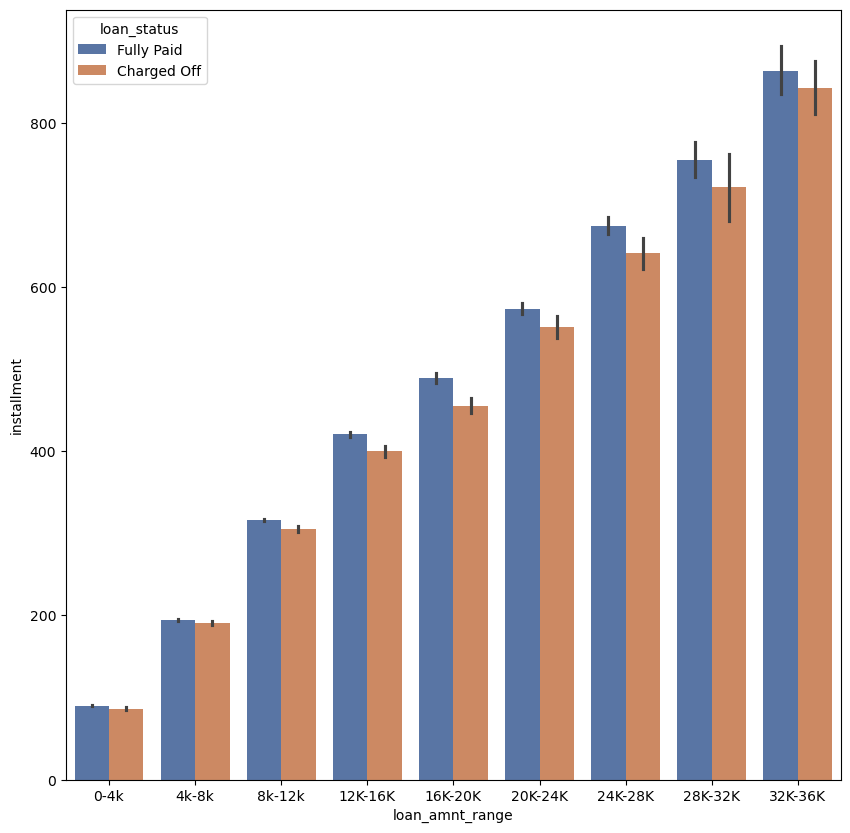

In [158]:
#Analysis of  Loan Amount vs Installments
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_range', y='installment', hue ='loan_status',palette="deep")
plt.show()


__Applicants having loan amount in the range of 32k-36k and monthly installment amount greater than 800 have the high chance of being defaulted__ 

#### Loan Amount vs Grade

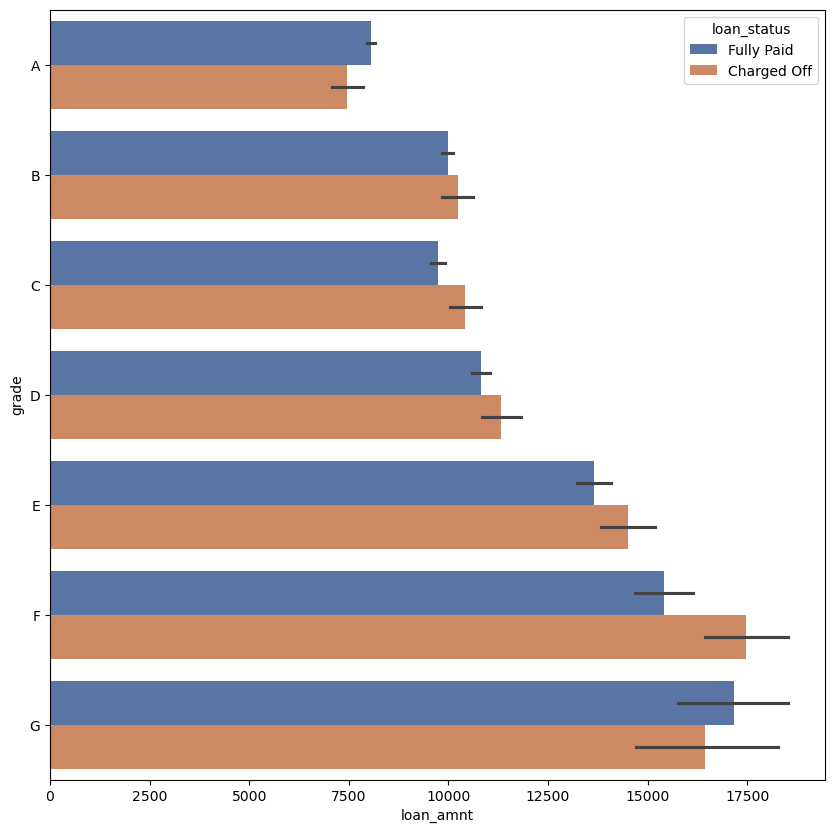

In [168]:
#Analysis of  Loan Amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="deep", order=['A','B','C','D','E','F','G'])
plt.show()


__Applicants having loan amount in the range of 15k-17.5k and Grade is F have the high chance of being defaulted__ 

#### Loan Amount vs Employee Length

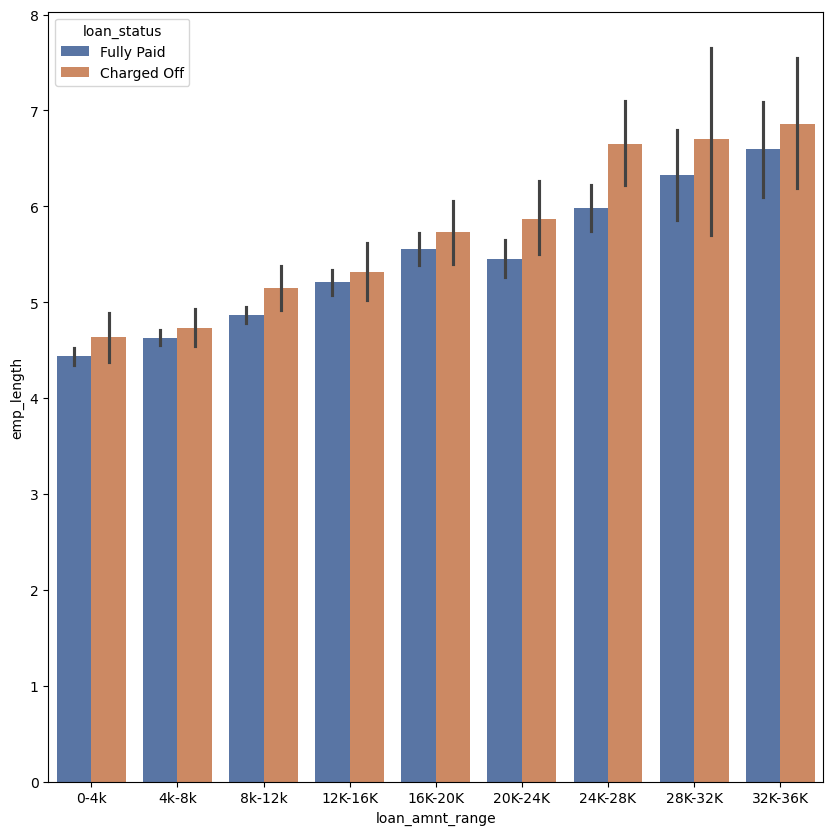

In [169]:
#Analysis of  Loan Amount vs Employee Length
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_range', y='emp_length', hue ='loan_status',palette="deep")
plt.show()


__Applicants having loan amount in the range of 24k-36k and Employee length between 6 to 7 years have the high chance of being defaulted__ 

#### Loan Amount vs Home Ownership

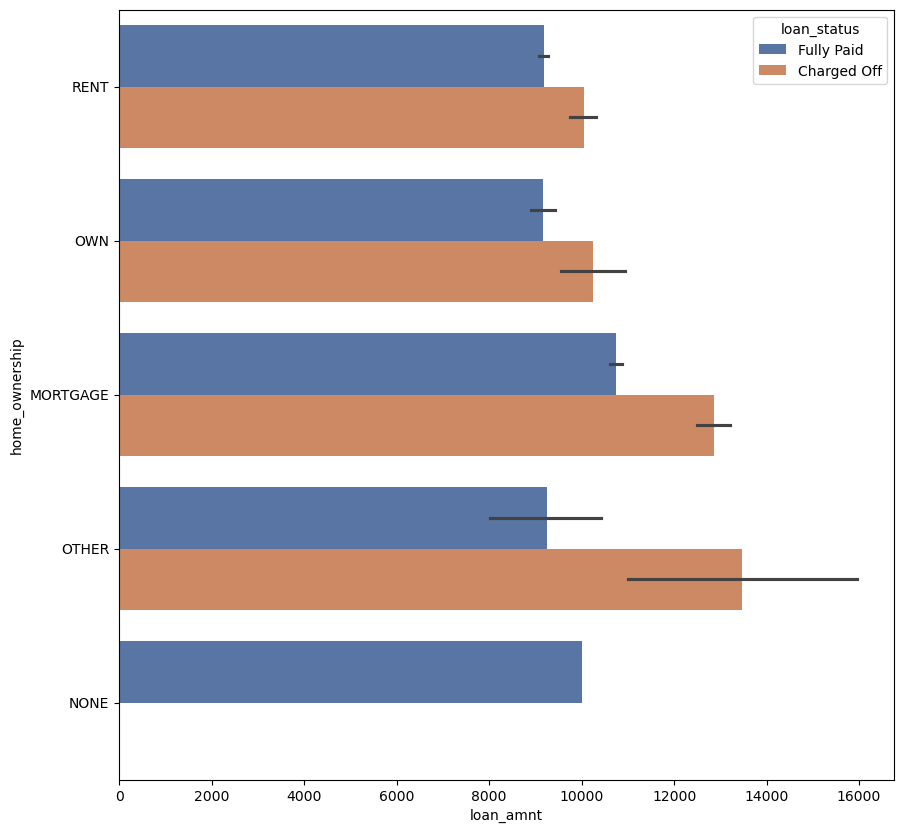

In [172]:
#Analysis of  Loan Amount vs Home Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="deep")
plt.show()


__Applicants having loan amount in the range of 12k-14k and  who are not owning the home have the high chance of being defaulted__ 

#### Loan Amount vs Annual Income

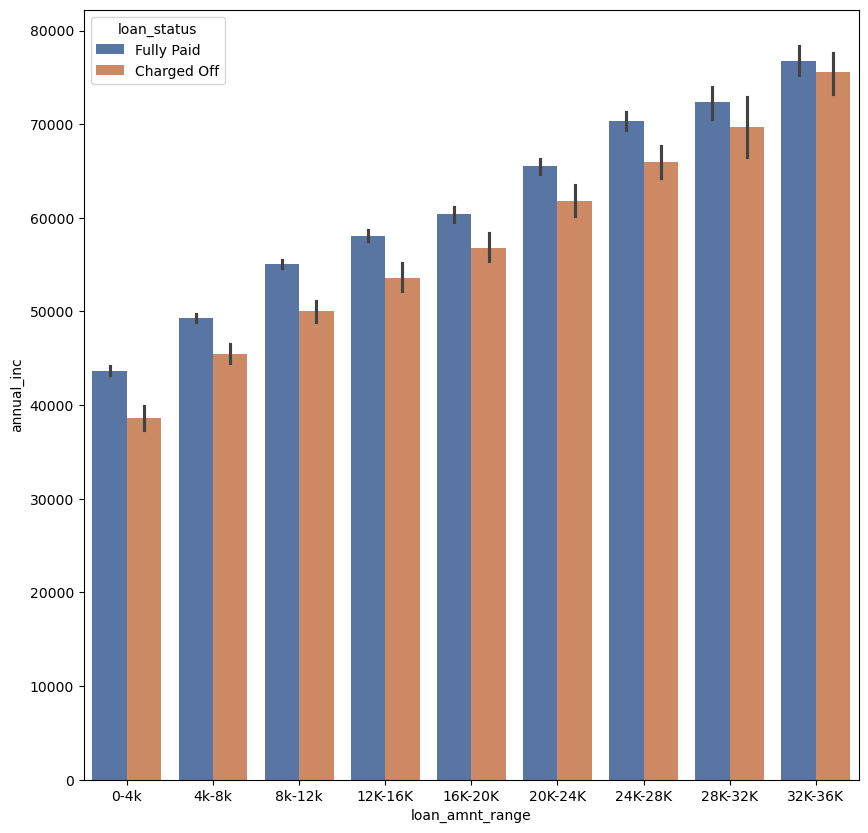

In [174]:
#Analysis of  Loan Amount vs Annual Income
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_range', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()


__Applicants having loan amount in the range of 32k-36k and annual income in range of 70k-80k  have the high chance of being defaulted__ 

#### Loan Amount vs Purpose

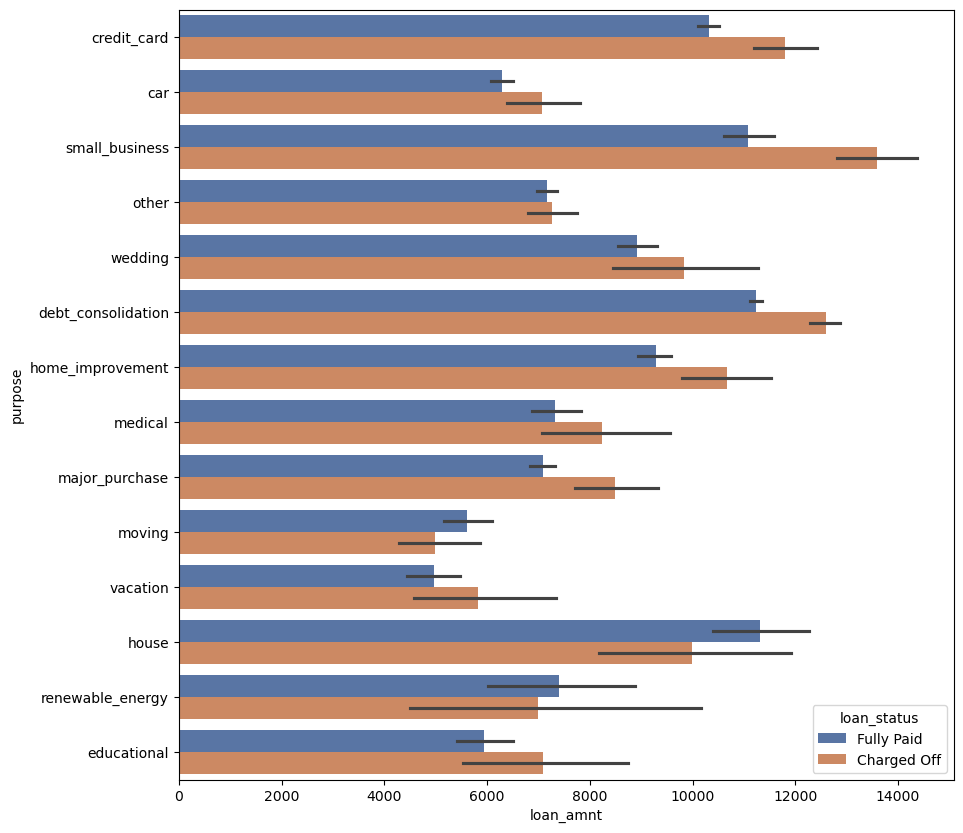

In [178]:
#Analysis of  Loan Amount vs Purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="deep")
plt.show()

__Applicants having loan amount in the range of 12k-14k and  taken a loan for small business  have the high chance of being defaulted___ 

__OBSERVATIONS ON ABOVE ANALYZED DATA__  

__For the Charged off loans there is a more chance of Applicant being default is as follows__   

- Applicants having loan amount in the range of 12k-14k and  taken a loan for small business
- Applicants having loan amount in the range of 32k-36k and annual income in range of 70k-80k
- Applicants having loan amount in the range of 12k-14k and  who are not owning the home
- Applicants having loan amount in the range of 24k-36k and Employee length between 6 to 7 years
- Applicants having loan amount in the range of 32k-36k and monthly installment amount greater than 800
- Applicants having loan amount in the range of 32k-36k and Interest rates in the range of 15-17.5
- Applicants having loan amount in the range of 15k-17.5k and Grade is F